In [6]:
t = var('t')
m = var('m')
c = var('c')
Ta=-20 + 273
T = function('T')(t)


def get_function(mass, c_, P):
    solution = desolve(diff(T, t, 1)==(P*int(T<(5+273))-2.75-5.67*10**-8*(T**4-Ta**4))/(c*m), ics=[0, Ta], ivar=t, dvar=T, show_method=True)
    tt=var('tt')
    sol = (solution[0](m=mass, c=c_).rhs()-solution[0](m=mass, c=c_).lhs()).subs({T:tt+273})
    def solver(t, tt):
        return sol(t=t, tt=tt)
    return sol
        


ms = [5, 7, 9, 11, 13, 15]
for M in ms:
    ps = [150, 200, 250, 300, 350, 400, 450]
    for P in ps:
        cs=[500, 750, 1000, 1125]
        plots = None
        color = ['blue', 'green', 'magenta', 'red']
        i=0
        
        for c_ in cs:
            s = get_function(M, c_, P)
            # print("Solution method: ", solution[1])
            tt = var('tt')
            if plots is None:
                plots = implicit_plot(s, (t, 0, 400), (tt, -25, 5), color=color[i], legend_label=f"c={c}")
                i+=1
            else:
                plots += implicit_plot(s, (t, 0, 400), (tt, -25, 5), color=color[i], legend_label=f"c={c}")
                i+=1
        plots.set_legend_options(back_color=(0.9,0.9,0.9), shadow=False)
        plots.axes_labels(['Время нагрева, сек', 'Температура, C'])
        plots.legend(True)
        plots.show(aspect_ratio=3.5, ymax=10)
        plots.save(f'/home/mrfox131/WORK/team/first_lab/m={M}_p={P}.pdf', aspect_ratio=3.5, ymax=10)

ValueError: cannot convert T(t) < 278 to int

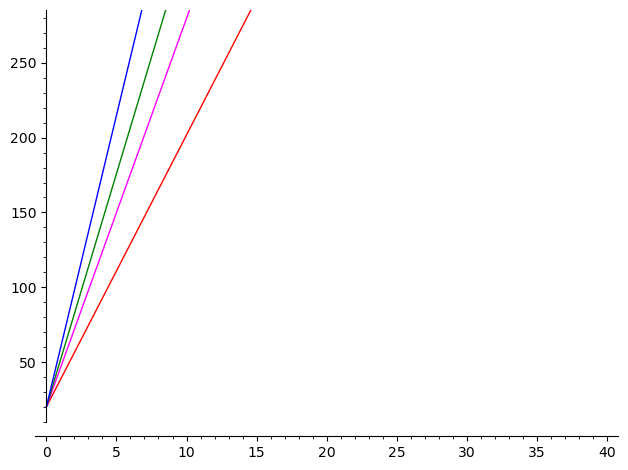

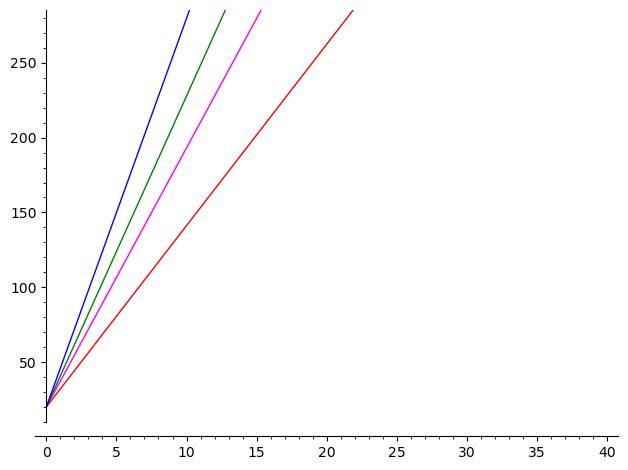

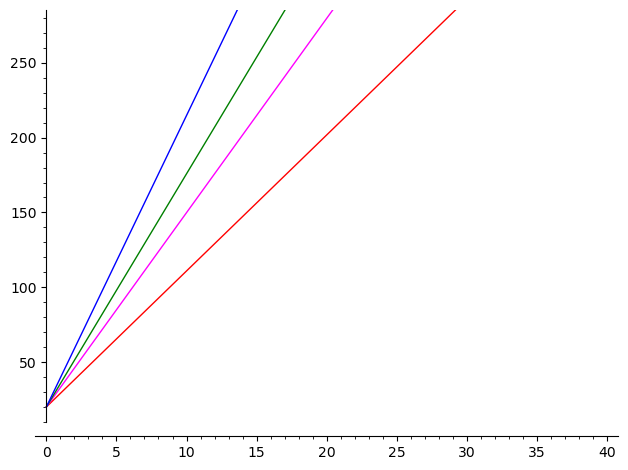

In [146]:
x = var('x')
y = function('y')(x)
m = var('m')
P = var('P')
ms=[0.01, 0.015, 0.02]
ps=[70,100,120,150]
maxt=280
for m_ in ms:
    plots = None
    color = list(reversed(['blue', 'green', 'magenta', 'red']))
    i=0
    for p in ps:
        if plots is None:
            plots = plot(((P*x)/(385*m)+20)(m=m_, P=p), ymin=15, ymax=280, xmin=0,xmax=40, color=color[i])
        else:
            plots += plot(((P*x)/(385*m)+20)(m=m_, P=p), ymin=15, ymax=280, xmin=0,xmax=40, color=color[i])
        i += 1
        
    display(plots)
    plots.save(f'/home/mrfox131/WORK/team/first_lab/mm={int(m_*1000)}.pdf', ymax=300)

In [5]:
diff(T, t, 1)==(P-2.1175+5.67*10**-8*(T**4-Ta**4))/(c*m)

diff(T(t), t) == ((5.67000000000000e-8)*T(t)^4 + 2.74092800000000)/(c*m)

In [21]:
Ta=-20 + 273
T = function('T')(t)

def get_heating(from_time, from_temp, P, c, m):
     return desolve_rk4(diff(T, t)==(P-2.75*(T+273-Ta)-5.67*10**-8*((T+273)**4-Ta**4))/(c*m), T, ics=[from_time, from_temp], end_points=600)

def get_cooling(from_time, from_temp, P, c, m):
     return desolve_rk4(diff(T, t)==(-2.75*(T+273-Ta)-5.67*10**-8*((T+273)**4-Ta**4))/(c*m), T, ics=[from_time, from_temp], end_points=600)

def get_fucking_saw(P, c, m, temp_ceil=6, temp_floor=2):
     initial_cons = get_heating(0, -20, P, c, m)
     heating = True
     for i in range(len(initial_cons)):
         if heating:
             if initial_cons[i][1]>temp_ceil:
                 initial_cons = initial_cons[:i]+get_cooling(initial_cons[i][0], initial_cons[i][1], P, c, m)
                 heating=False
         else:
             if initial_cons[i][1]<temp_floor:
                 initial_cons = initial_cons[:i]+get_heating(initial_cons[i][0], initial_cons[i][1], P, c, m)
                 heating=True
     return initial_cons

IOStream.flush timed out


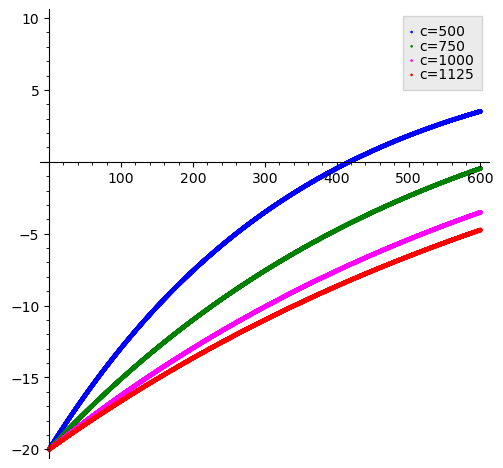

IOStream.flush timed out


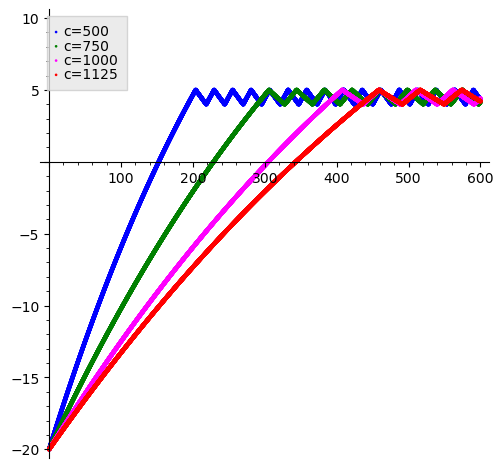

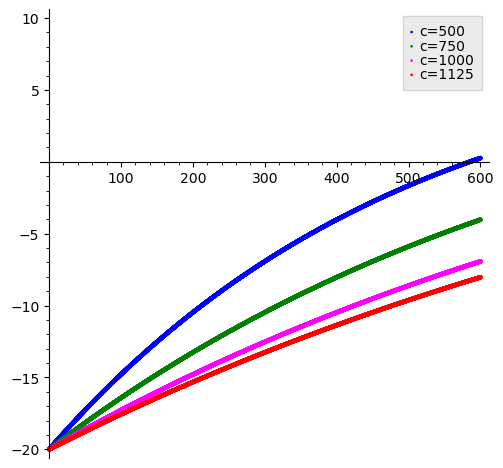

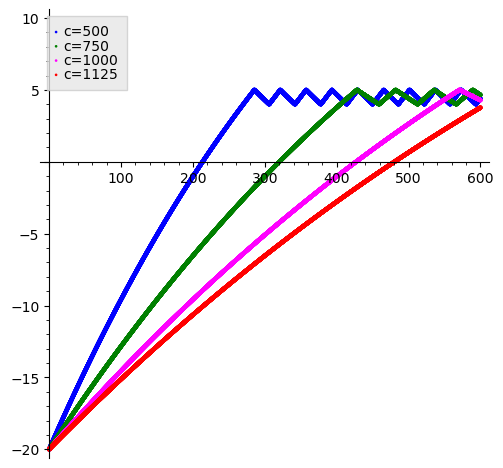

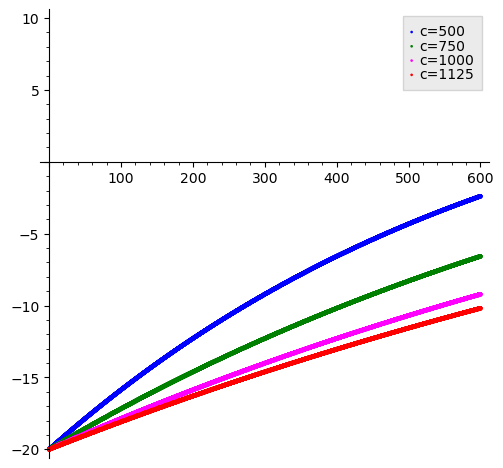

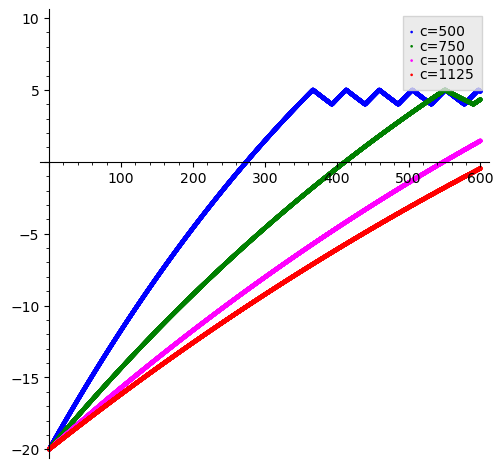

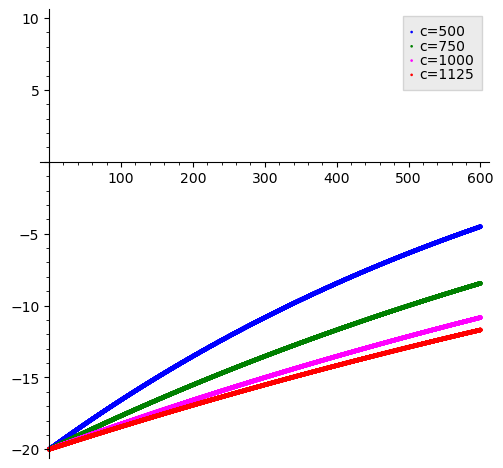

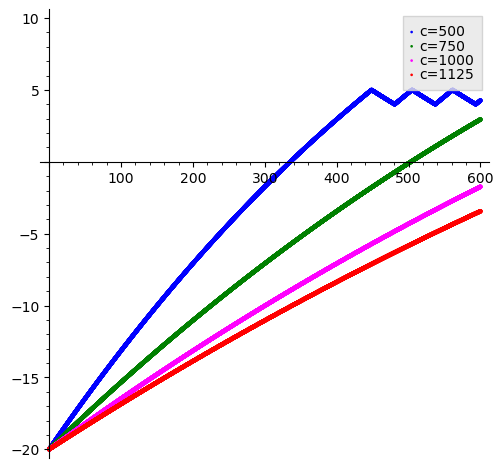

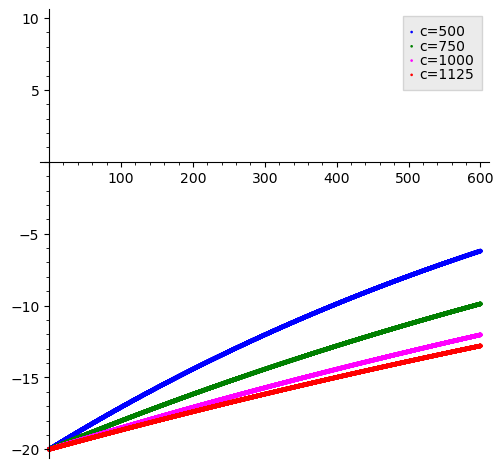

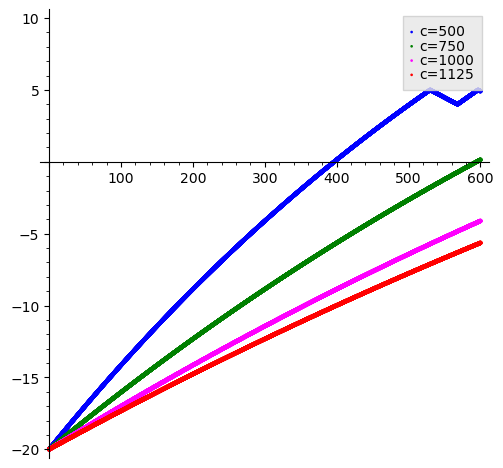

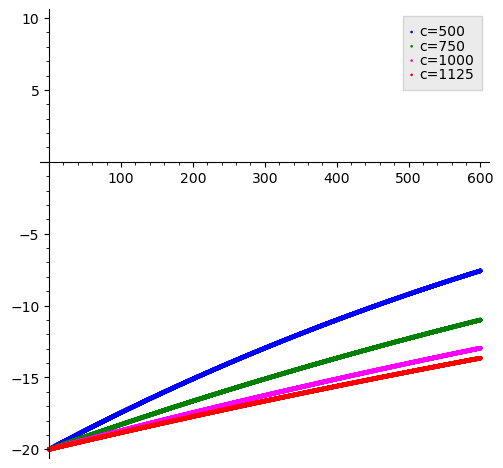

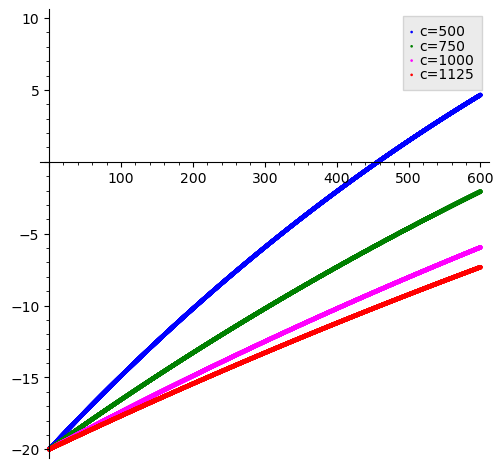

In [23]:
ms = [5, 7, 9, 11, 13, 15]
for M in ms:
    ps = [200, 400]
    for P in ps:
        cs=[500, 750, 1000, 1125]
        plots = None
        color = ['blue', 'green', 'magenta', 'red']
        i=0
        
        for c_ in cs:
            if plots is None:
                plots = list_plot(get_fucking_saw(P, c_, M, temp_ceil=5, temp_floor=4), color=color[i], legend_label=f"c={c_}")
                i+=1
            else:
                plots += list_plot(get_fucking_saw(P, c_, M, temp_ceil=5, temp_floor=4), color=color[i], legend_label=f"c={c_}")
                i+=1
        plots.set_legend_options(back_color=(0.9,0.9,0.9), shadow=False)
        plots.legend(True)
        plots.show(aspect_ratio=20, ymax=10)
        plots.save(f'/home/mrfox131/WORK/team/first_lab/m={M}_p={P}.pdf', aspect_ratio=20, ymax=10)

In [30]:
def get_heating(from_time, from_temp, P, c, m):
     return desolve_rk4(diff(T, t)==(P-40.2*10**-4*(T+273-Ta)-17.01*10**-14*((T+273)**4-Ta**4))/(c*m), T, ics=[from_time, from_temp], end_points=200)

def get_cooling(from_time, from_temp, P, c, m):
     return desolve_rk4(diff(T, t)==(-40.2*10**-4*(T+273-Ta)-17.01*10**-14*((T+273)**4-Ta**4))/(c*m), T, ics=[from_time, from_temp], end_points=200)

def get_fucking_saw(P, c, m, temp_ceil=6, temp_floor=2):
     initial_cons = get_heating(0, 20, P, c, m)
     heating = True
     for i in range(len(initial_cons)):
         if heating:
             if initial_cons[i][1]>temp_ceil:
                 initial_cons = initial_cons[:i]+get_cooling(initial_cons[i][0], initial_cons[i][1], P, c, m)
                 heating=False
         else:
             if initial_cons[i][1]<temp_floor:
                 initial_cons = initial_cons[:i]+get_heating(initial_cons[i][0], initial_cons[i][1], P, c, m)
                 heating=True
     return initial_cons

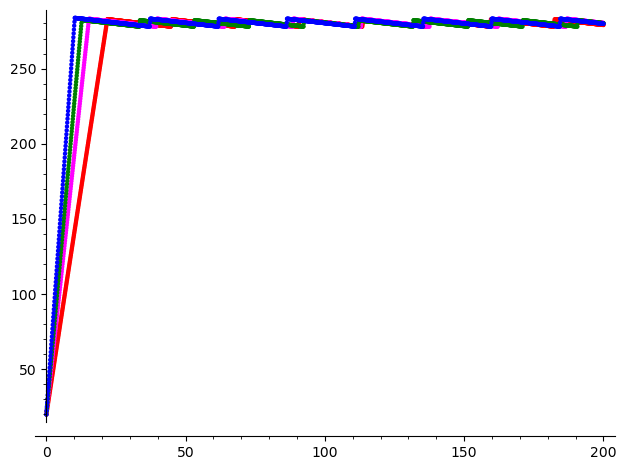

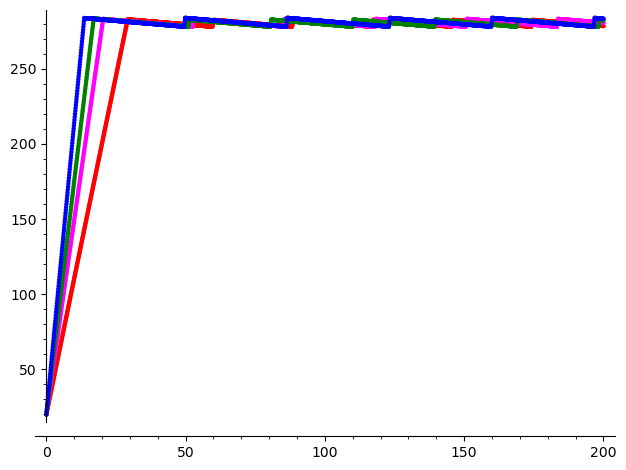

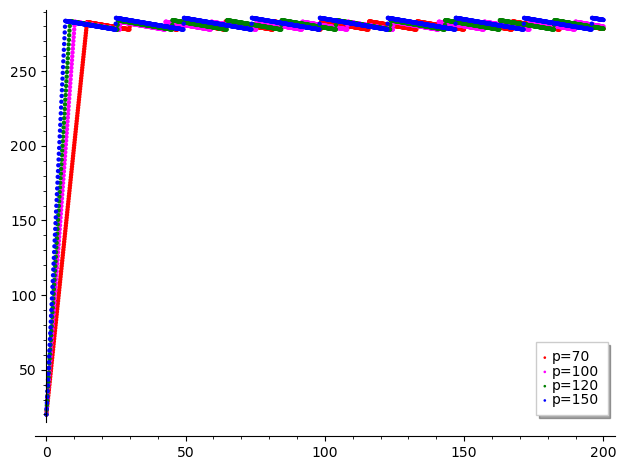

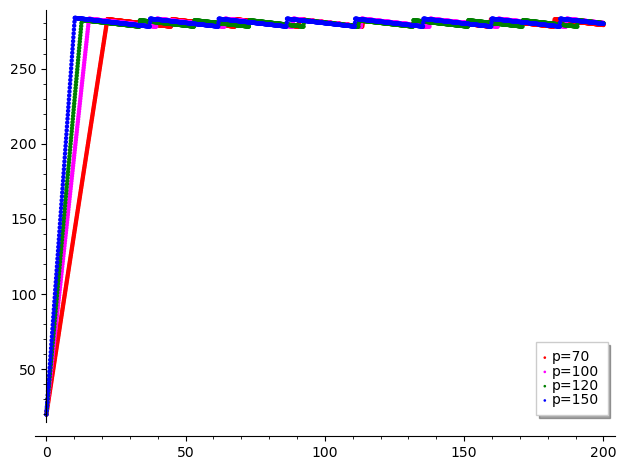

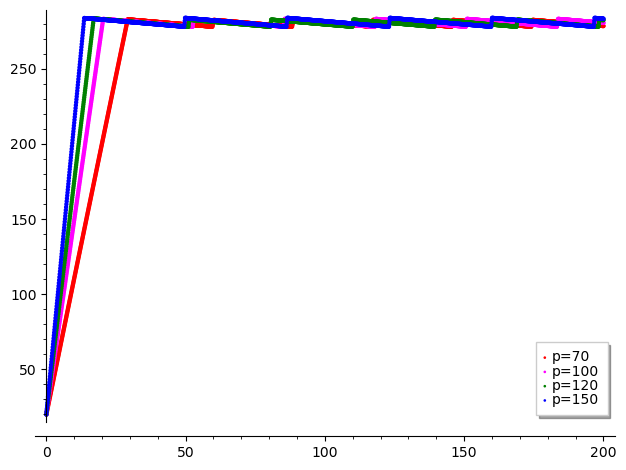

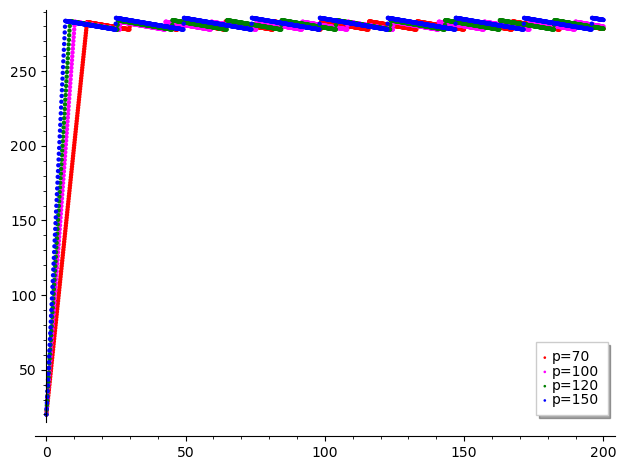

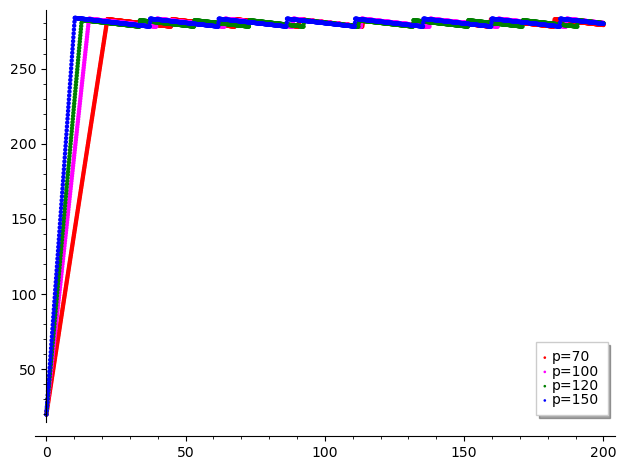

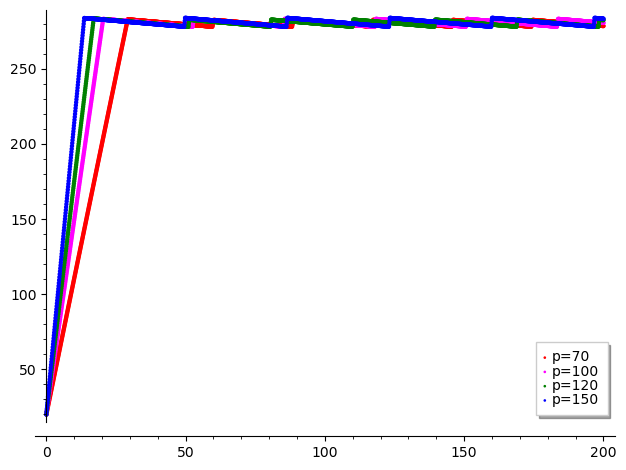

In [35]:
ms=[0.01, 0.015, 0.02]
ps=[70,100,120,150]
maxt=280
for m_ in ms:
    plots = plot([])
    color = list(reversed(['blue', 'green', 'magenta', 'red']))
    i=0
    for p in ps:
        plots += list_plot(get_fucking_saw(p, 385, m_, temp_ceil=maxt+2, temp_floor=maxt-2), color=color[i], legend_label=f"p={p}")
        i += 1
    plots.legend(True)
    display(plots)
    plots.save(f'/home/mrfox131/WORK/team/first_lab/mm={int(m_*1000)}.pdf', ymax=300)